# LINEAR REGRESSION 

#### To perform linear regression on this data, and train the model for prediction. After training, evaluate the model with MAE, MSE, and RMSE. 

####  Also perform Check Homoscedasticity 

- Homoscedasticity means that the residuals (differences between observed and predicted values) have constant variance across all levels of the predictor

## EXAMPLE 1

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import scipy.stats as stats

In [2]:
path = "C:/Users/sidiq/OneDrive/Desktop/Linear-Reg/Linear-Regression/DATA/student_scores.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df.head(4)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75


In [5]:
df.shape

(25, 2)

In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

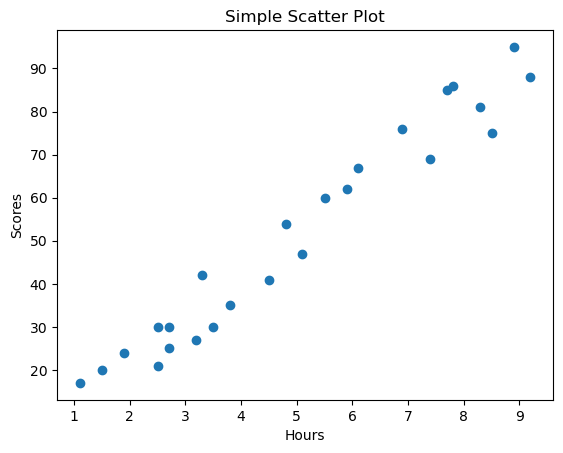

In [7]:
plt.scatter(df['Hours'], y = df['Scores'])
plt.title("Simple Scatter Plot")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [8]:
correlation_matrix = df.corr()
print(correlation_matrix)

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


##### The correlation coefficient between the number of hours spent studying and the scores obtained is 0.97. This indicates a strong linear relationship between the two variables, suggesting that as the number of hours spent studying increases, the scores tend to increase as well.

In [9]:
X = df['Hours'].values
Y = df['Scores'].values

In [10]:
X = X.reshape(-1,1)

In [11]:
Y = Y.reshape(-1,1)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_test, X_train, y_test , y_train = train_test_split(X,Y, test_size=0.4, random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred = regressor.predict(X)

In [16]:
print(y_pred)

[[27.85947669]
 [53.46262999]
 [34.75263334]
 [86.94367662]
 [37.70684334]
 [18.01211003]
 [93.83683328]
 [57.40157665]
 [84.97420329]
 [29.82895002]
 [79.06578329]
 [61.34052331]
 [47.55421   ]
 [35.73737001]
 [14.07316337]
 [90.88262328]
 [27.85947669]
 [21.95105669]
 [63.30999665]
 [76.1115733 ]
 [29.82895002]
 [50.50841999]
 [40.66105334]
 [71.18788997]
 [80.05051996]]


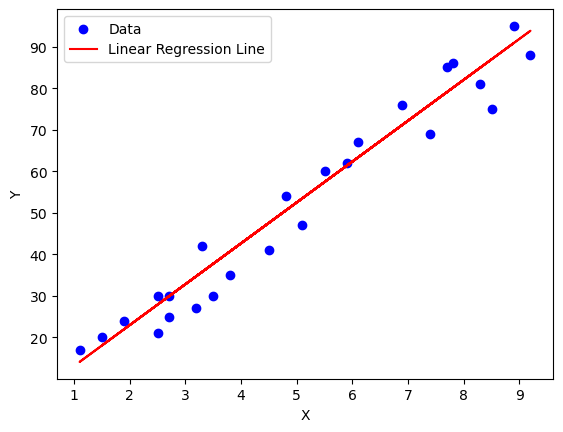

In [17]:
plt.scatter(X,Y, color = "Blue", label = 'Data')
plt.plot(X,y_pred, color ='Red' , label = "Linear Regression Line")
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [18]:
from sklearn.metrics import mean_absolute_error 

mae = mean_absolute_error(Y,y_pred)
print("Mean Absolute Error is = " , mae)

Mean Absolute Error is =  4.859304931231131


In [19]:
from sklearn.metrics import mean_squared_error 

msq = mean_squared_error(Y,y_pred)
print("Mean Squared Error is = " , msq)

Mean Squared Error is =  30.159672050910384


In [20]:
print("Root Mean Squared Error is; RMSE = " , np.sqrt(msq))

Root Mean Squared Error is; RMSE =  5.491782229013673


### To Check Homoscedasticity 

- Homoscedasticity means that the residuals (differences between observed and predicted values) have constant variance across all levels of the predicto

For this we can make use of following
   
   - Graphical Test
   - Statistical Test

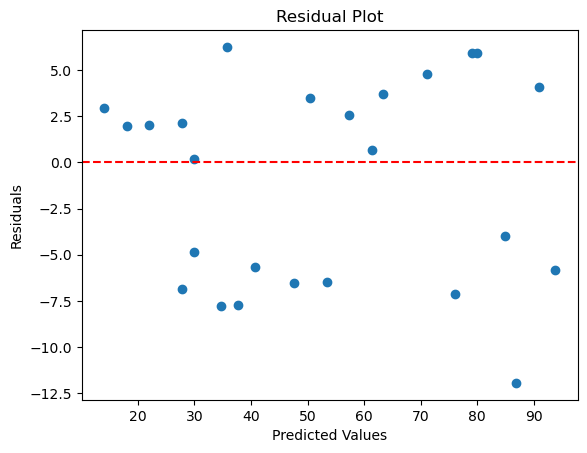

In [21]:
### Graphical Test

residuals = Y - y_pred

plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

------------

In [22]:
# Statistical Test

Breusch-Pagan Test: A statistical test for homoscedasticity. It tests the null hypothesis that the variance of the residuals is constant across the range of data.

In [23]:
import statsmodels.api as sm

from statsmodels.stats.diagnostic import het_breuschpagan

# Perform the test
bp_test = het_breuschpagan(residuals, sm.add_constant(X))
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': 2.428072360913072, 'p-value': 0.1191793723864109, 'f-value': 2.4741202964116766, 'f p-value': 0.12939065243841838}


Since p value = 0.1191 > typical 0.05 no evidence against the null hypothesis

So we can continue our assumption of homoscedasticity

## EXAMPLE 2

- Fit the model
- Find residuals as well as normalised residuals
- Plot the graphs
    - error (standardized error) vs x values
    - error (standardized error) vs predicted y values
    - predicted y vs y
    - normal probabilistic distribution of normal
- Check normality of error terms
- Check homoscedasticity 

Here is the data on $x = $ area liberation rate and $ y = NO_x$ emissions. 

$$
\begin{array}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
x & 100 & 125 & 125 & 150 & 150 & 200 & 200 & 250 & 250 & 300 & 300 & 350 & 400 & 400  \\
\hline
y & 150 & 140 & 180 & 210 & 190 & 320 & 280 & 400 & 430 & 440 & 390 & 600 & 610 & 670 \\
\hline
\end{array}
$$

### Create DataFrame for the Dataset

In [24]:
X = [100 ,125 , 125 , 150 , 150 , 200 , 200 , 250 , 250 , 300 , 300 , 350 , 400 , 400]
Y = [150 , 140, 180 , 210 , 190 , 320 , 280 , 400 , 430 , 440 , 390 , 600 , 610 , 670]

df = pd.DataFrame({'X': X, 'Y': Y})

In [25]:
df

,X,Y
0,100,150
1,125,140
2,125,180
3,150,210
4,150,190
5,200,320
6,200,280
7,250,400
8,250,430
9,300,440


### Scatter plot of the data

In [26]:
import seaborn as sns

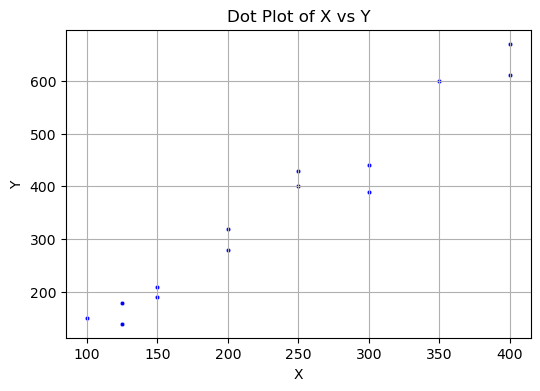

In [27]:
# Plot (X,Y)

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='X', y='Y', s=10, color="blue", marker="o")
plt.title("Dot Plot of X vs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

### Fit The Model

In [28]:
X = df['X'].values
Y = df['Y'].values

X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [29]:
regressor.fit(X,Y)

LinearRegression()

### Predictions

In [30]:
# Predicted values i.e points on the regressive line
df['Predicted_Y'] = regressor.predict(X)

In [31]:
df.head()

,X,Y,Predicted_Y
0,100,150,125.591327
1,125,140,168.377135
2,125,180,168.377135
3,150,210,211.162943
4,150,190,211.162943


### Residuals

In [32]:
df['Residuals'] = df['Y'] - df['Predicted_Y']
df.head()

,X,Y,Predicted_Y,Residuals
0,100,150,125.591327,24.408673
1,125,140,168.377135,-28.377135
2,125,180,168.377135,11.622865
3,150,210,211.162943,-1.162943
4,150,190,211.162943,-21.162943


### Standardized residuals

In [33]:
import math

In [34]:
# df['Normalised Residuals'] = (df['Residuals'])/(df['Residuals'].std()*math.sqrt(1- 1/14 -  ))

In [35]:
df.head()

,X,Y,Predicted_Y,Residuals
0,100,150,125.591327,24.408673
1,125,140,168.377135,-28.377135
2,125,180,168.377135,11.622865
3,150,210,211.162943,-1.162943
4,150,190,211.162943,-21.162943


In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df['Standardized Residuals'] = scaler.fit_transform(df[['Residuals']])

In [37]:
df.head()

,X,Y,Predicted_Y,Residuals,Standardized Residuals
0,100,150,125.591327,24.408673,0.717427
1,125,140,168.377135,-28.377135,-0.834069
2,125,180,168.377135,11.622865,0.341623
3,150,210,211.162943,-1.162943,-0.034182
4,150,190,211.162943,-21.162943,-0.622027


### Plot for error (standardized error) vs x values

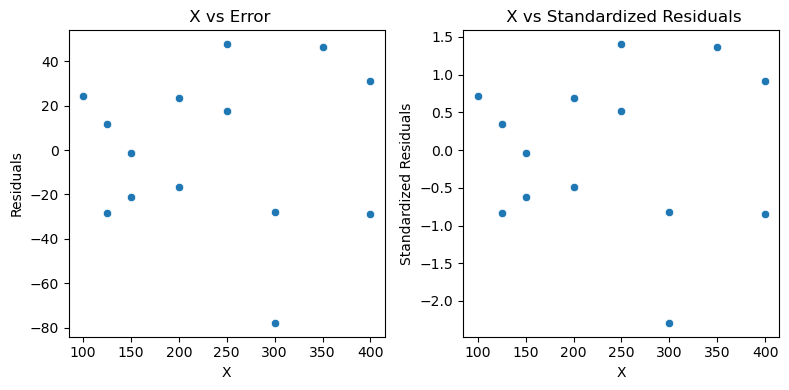

In [38]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 4))

# First subplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.scatterplot(x='X', y='Residuals', data=df)
plt.title(' X vs Error')
plt.xlabel('X')
plt.ylabel('Residuals')

# Second subplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.scatterplot(x='X', y='Standardized Residuals', data=df)
plt.title(' X vs Standardized Residuals')
plt.xlabel('X')
plt.ylabel('Standardized Residuals')

# Show the plots
plt.tight_layout()
plt.show()

- Both residual plots show no unusual pattern or discrepant values.
There is one standardized residual slightly outside the interval (-2, 2), but this is not
surprising in a sample of size 14
- The errors are almost normally distributed

In [39]:
### Plot for Y vs Predicted Y

Text(0, 0.5, 'Predicted Y')

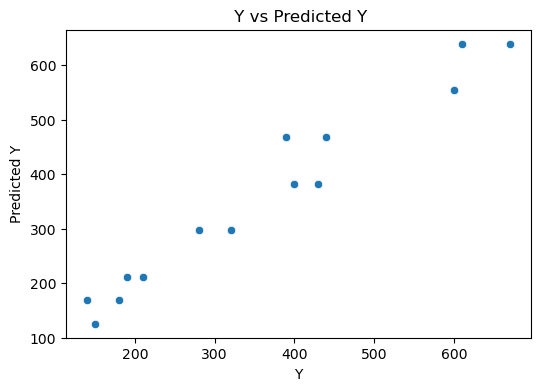

In [40]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Y', y='Predicted_Y', data=df)

# Adding title and labels
plt.title(' Y vs Predicted Y')
plt.xlabel('Y')
plt.ylabel('Predicted Y')

Nearly 45 degree line so model can be used to prediction

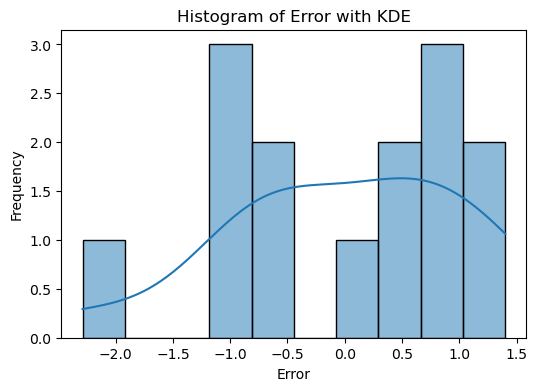

In [41]:
# Create the histogram
plt.figure(figsize=(6,4))
sns.histplot(df['Standardized Residuals'], kde=True, bins=10)  # 'bins' controls the number of bins
plt.title('Histogram of Error with KDE')
plt.xlabel('Error')
plt.ylabel('Frequency')

# Display the plot
plt.show()


### To Check Normality Of The Residuals 

Graphical Test
- If values against theoretical values lies within a straight line the data may be normal

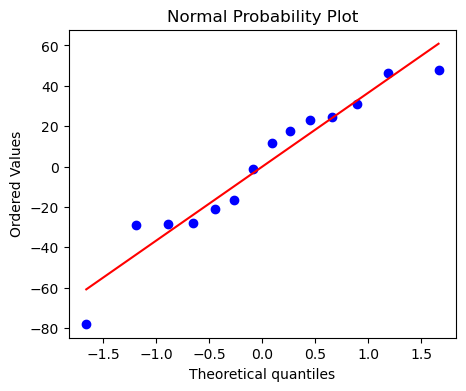

In [45]:
plt.figure(figsize=(5,4))
stats.probplot(df['Residuals'], dist="norm", plot=plt)
plt.title('Normal Probability Plot')
plt.show()

Shapiro Test

Null Hypothesis : Given Sample Follows Normal Distribution

In [47]:
w_statistic, p_value = stats.shapiro(df['Residuals'])

w_statistic, p_value

(0.9389799237251282, 0.40540820360183716)

p value = 0.405 > 0.05 No evidence for the alternate hypothesis. So we continue our assumption that the distribution is normal

### To Check Homoscedasticity 

In [42]:
# Statistical test

In [48]:
y_predict = regressor.predict(X)

residuals = Y- y_predict

In [49]:
import statsmodels.api as sm

from statsmodels.stats.diagnostic import het_breuschpagan

# Perform the test
bp_test = het_breuschpagan(residuals, sm.add_constant(X))
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': 1.9080601253437801, 'p-value': 0.16717890236653096, 'f-value': 1.8935523779865244, 'f p-value': 0.19393926928637878}


-  p_value = 0.1671 > 0.05 No evidence to reject H_0
- So we continue our assumption of homoscedasticity